In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainset_np = np.asarray(trainset.data)
trainset_labels = np.asarray(trainset.targets)
testset_np = np.asarray(testset.data)
testset_labels = np.asarray(testset.targets)

validset_np = trainset_np[40000:50000]
validset_labels = trainset_labels[40000:50000]
trainset_np = trainset_np[0:40000]
trainset_labels = trainset_labels[0:40000]
print(trainset_np.shape)
print(trainset_labels.shape)
print(validset_np.shape)
print(validset_labels.shape)
print(testset_np.shape)
print(testset_labels.shape)

(40000, 32, 32, 3)
(40000,)
(10000, 32, 32, 3)
(10000,)
(10000, 32, 32, 3)
(10000,)


In [5]:
trainset_flattened = np.empty((40000,3072))
validset_flattened = np.empty((10000,3072))
testset_flattened = np.empty((10000,3072))

for i in range (trainset_np.shape[0]):
    trainset_flattened[i] = trainset_np[i].flatten()

for i in range (validset_np.shape[0]):
    validset_flattened[i] = validset_np[i].flatten()

for i in range (testset_np.shape[0]):
    testset_flattened[i] = testset_np[i].flatten()

print(trainset_flattened.shape)
print(validset_flattened.shape)
print(testset_flattened.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [11]:
model = LogisticRegression(random_state=seed, max_iter=10, solver='saga', fit_intercept=True, penalty='l2')
model.fit(trainset_flattened, trainset_labels)

print("Training accuracy: ", model.score(trainset_flattened, trainset_labels))
print("Validation accuracy: ", model.score(validset_flattened, validset_labels))
print("Test accuracy: ", model.score(testset_flattened, testset_labels))

c:\Users\nsavd\anaconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training accuracy:  0.448475
Validation accuracy:  0.4009
Test accuracy:  0.4041


c:\Users\nsavd\anaconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\nsavd\anaconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nsavd\anaconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nsavd\anaconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nsavd\anaconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

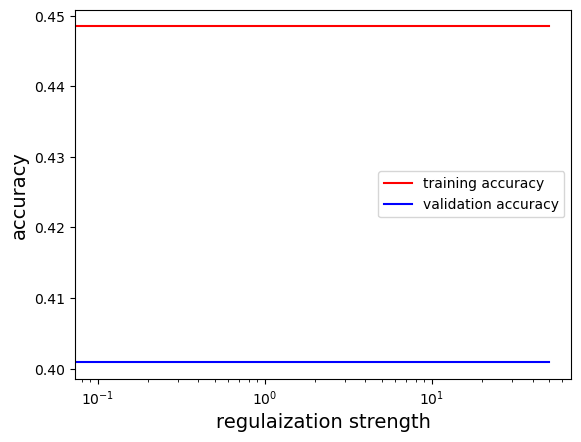

In [6]:
coefs_ = []
train_accuracies = []
valid_accuracies = []
cs = [0, 0.1, 1, 10, 50]

for c in cs:
    if c == 0:
        classifier = LogisticRegression(random_state=seed, max_iter=10, solver='sag', penalty='none', fit_intercept=True)
    else:
        classifier = LogisticRegression(random_state=seed, max_iter=10, penalty='l2', solver='sag', fit_intercept=True, C=1/c)

    classifier.fit(trainset_flattened, trainset_labels)
    coefs_.append(classifier.coef_[0])
    
    train_accuracies.append(classifier.score(trainset_flattened, trainset_labels))
    valid_accuracies.append(classifier.score(validset_flattened, validset_labels))

fig, axes = plt.subplots()
axes.semilogx(cs, train_accuracies, color='red', label='training accuracy')
axes.semilogx(cs, valid_accuracies, color='blue', label='validation accuracy')
axes.set_xlabel('regulaization strength', fontsize=14)
axes.set_ylabel('accuracy', fontsize=14)
axes.legend()

In [7]:
print("Training accuracy: ", train_accuracies)
print("Validation accuracy: ", valid_accuracies)

Training accuracy:  [0.448475, 0.448475, 0.448475, 0.448475, 0.448475]
Validation accuracy:  [0.4009, 0.4009, 0.4009, 0.4009, 0.4009]


In [8]:
model = LogisticRegression(random_state=seed, max_iter=100, solver='saga', fit_intercept=True, penalty='l2')
model.fit(trainset_flattened, trainset_labels)

print("Training accuracy: ", model.score(trainset_flattened, trainset_labels))
print("Validation accuracy: ", model.score(validset_flattened, validset_labels))

c:\Users\nsavd\anaconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training accuracy:  0.4778
Validation accuracy:  0.3903


In [9]:
print("Test accuracy: ", model.score(testset_flattened, testset_labels))

Test accuracy:  0.3918
